In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df= pd.read_csv('epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [17]:
#create scatter plot,scatter plot shows how sea levels have changed over time. It gives a visual sense of the data’s trend.

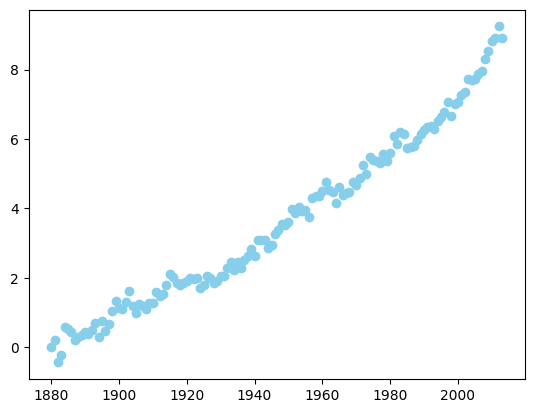

In [18]:
plt.scatter(df['Year'],df['CSIRO Adjusted Sea Level'],label='original data',color='skyblue')

In [19]:
#performing linear regression to identify overall longterm trend in sea level scince 1880 and project it forward

In [20]:
df['CSIRO Adjusted Sea Level'] = df['CSIRO Adjusted Sea Level'].interpolate(method='linear')#data clean as csiro comtains NaN VALUES

In [21]:
from scipy.stats import linregress
res_all=linregress(df['Year'],df['CSIRO Adjusted Sea Level'])

In [22]:
#We want to draw the best fit line through the original data and extend it to 2050 to predict future rise.

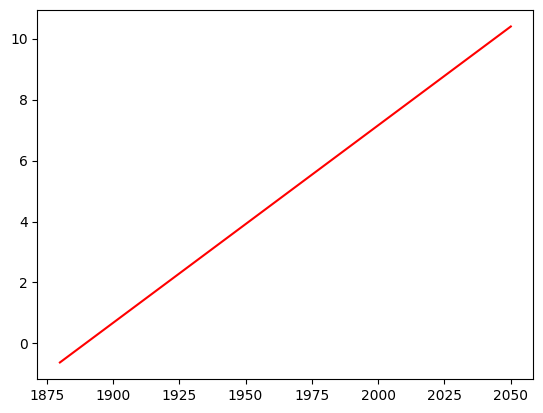

In [27]:
x = list(range(1880, 2051))## Generate prediction line
y= [res_all.slope * Year + res_all.intercept for Year in x]
plt.plot(x, y, color='red', label='Best Fit: 1880–2050')
plt.show()

In [28]:
#Let's add a second line of best fit to your sea level plot, using data from the year 2000 onward, and extend that line to predict sea level in 2050.


In [33]:
df_recent =df[df['Year']>=2000]
res_recent=linregress(df_recent['Year'],df_recent['CSIRO Adjusted Sea Level'])
x_recent = list(range(2000, 2051))
y_recent = [res_recent.slope * year + res_recent.intercept for year in x_recent]


Text(0.5, 1.0, 'Rise in Sea Level')

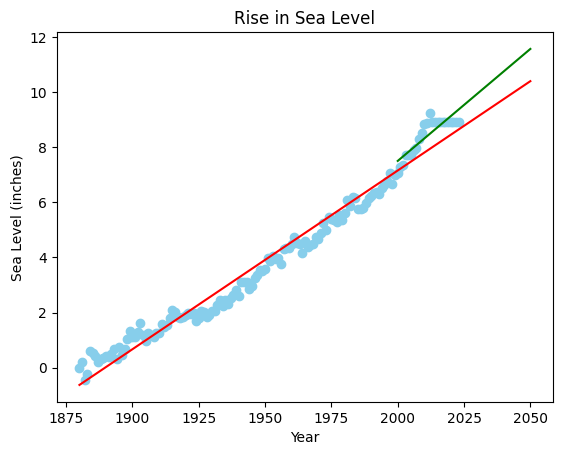

In [38]:
# Scatter plot of data
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='skyblue', label='Original Data')

# Line of best fit (1880–2050)
plt.plot(x, y, 'r', label='Best Fit Line: 1880–2050')

# Line of best fit (2000–2050)
plt.plot(x_recent, y_recent, 'green', label='Best Fit Line: 2000–2050')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')